# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

In [6]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.Class.unique()

array([0, 1], dtype=int64)

In [11]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(data.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


### 3.Standardized the Input Variables.

### 4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

In [14]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
feature_names = data.iloc[:, 1:30].columns
target = data.iloc[:1, 30: ].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [16]:
data_features = data[feature_names]
data_target = data[target]

xtrain, xtest, ytrain, ytest = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(xtrain)))
print("Length of X_test is: {X_test}".format(X_test = len(xtest)))
print("Length of y_train is: {y_train}".format(y_train = len(ytrain)))
print("Length of y_test is: {y_test}".format(y_test = len(ytest)))

Length of X_train is: 199364
Length of X_test is: 85443
Length of y_train is: 199364
Length of y_test is: 85443


In [17]:
#Normalize
mean = xtrain.mean(axis=0)
xtrain -= mean
std = xtrain.std(axis=0)
xtrain /= std
xtest -= mean
xtest /= std

### 5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

### 6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
network = models.Sequential()
network.add(layers.Dense(10,activation="relu",input_shape=(len(xtrain.columns),) ))
network.add(layers.Dense(8,activation="relu"))
network.add(layers.Dense(6,activation="relu"))
network.add(layers.Dense(1,activation="sigmoid"))
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

### 7.Train the Model with Epochs (100).

In [22]:
with tf.device('/device:GPU:1'):
  %time MODEL = network.fit(xtrain,ytrain,epochs=100,batch_size=256)

Epoch 1/100
779/779 [==============================] - 7s 5ms/step - loss: 0.1572 - acc: 0.9811
Epoch 2/100
779/779 [==============================] - 2s 3ms/step - loss: 0.0050 - acc: 0.9986
Epoch 3/100
779/779 [==============================] - 2s 3ms/step - loss: 0.0052 - acc: 0.9992
Epoch 4/100
779/779 [==============================] - 2s 3ms/step - loss: 0.0039 - acc: 0.9993
Epoch 5/100
779/779 [==============================] - 2s 2ms/step - loss: 0.0034 - acc: 0.9995
Epoch 6/100
779/779 [==============================] - 2s 2ms/step - loss: 0.0042 - acc: 0.9993
Epoch 7/100
779/779 [==============================] - 1s 1ms/step - loss: 0.0039 - acc: 0.9993
Epoch 8/100
779/779 [==============================] - 1s 2ms/step - loss: 0.0037 - acc: 0.9994
Epoch 9/100
779/779 [==============================] - 1s 1ms/step - loss: 0.0031 - acc: 0.9994
Epoch 10/100
779/779 [==============================] - 1s 1ms/step - loss: 0.0040 - acc: 0.9994
Epoch 11/100
779/779 [=================

779/779 [==============================] - 2s 2ms/step - loss: 0.0026 - acc: 0.9995
Epoch 85/100
779/779 [==============================] - 2s 2ms/step - loss: 0.0025 - acc: 0.9995
Epoch 86/100
779/779 [==============================] - 1s 2ms/step - loss: 0.0029 - acc: 0.9995
Epoch 87/100
779/779 [==============================] - 1s 2ms/step - loss: 0.0029 - acc: 0.9995
Epoch 88/100
779/779 [==============================] - 1s 1ms/step - loss: 0.0021 - acc: 0.9996
Epoch 89/100
779/779 [==============================] - 1s 1ms/step - loss: 0.0028 - acc: 0.9995
Epoch 90/100
779/779 [==============================] - 1s 1ms/step - loss: 0.0025 - acc: 0.9995
Epoch 91/100
779/779 [==============================] - 3s 4ms/step - loss: 0.0029 - acc: 0.9995
Epoch 92/100
779/779 [==============================] - 3s 4ms/step - loss: 0.0030 - acc: 0.9994
Epoch 93/100
779/779 [==============================] - 2s 3ms/step - loss: 0.0029 - acc: 0.9995
Epoch 94/100
779/779 [=====================

### 8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

In [23]:
from keras import optimizers
network.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [24]:
from keras import losses
from keras import metrics
network.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [25]:
x_val = xtrain[:10000]
partial_x_train = xtrain[10000:]

In [26]:
y_val = ytrain[:10000]
partial_y_train = ytrain[10000:]

In [28]:
network.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = network.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
370/370 [==============================] - 6s 9ms/step - loss: 0.0028 - acc: 0.9995 - val_loss: 0.0016 - val_acc: 0.9995
Epoch 2/20
370/370 [==============================] - 3s 7ms/step - loss: 0.0024 - acc: 0.9996 - val_loss: 0.0014 - val_acc: 0.9995
Epoch 3/20
370/370 [==============================] - 1s 4ms/step - loss: 0.0031 - acc: 0.9994 - val_loss: 0.0017 - val_acc: 0.9995
Epoch 4/20
370/370 [==============================] - 1s 4ms/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0013 - val_acc: 0.9996
Epoch 5/20
370/370 [==============================] - 1s 3ms/step - loss: 0.0026 - acc: 0.9995 - val_loss: 0.0015 - val_acc: 0.9995
Epoch 6/20
370/370 [==============================] - 1s 3ms/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0016 - val_acc: 0.9996
Epoch 7/20
370/370 [==============================] - 2s 5ms/step - loss: 0.0026 - acc: 0.9995 - val_loss: 0.0035 - val_acc: 0.9995
Epoch 8/20
370/370 [==============================] - 2s 5ms/step - loss: 0.

In [33]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

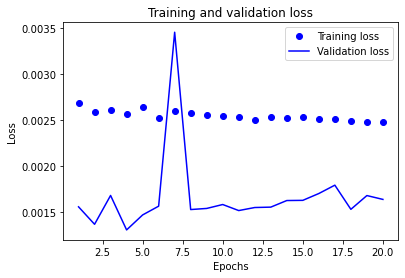

In [31]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history.history['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

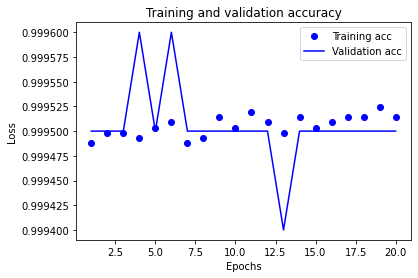

In [34]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 9.Prediction should be > 92% 

### 10.Evaluation Step 11Prediction

In [35]:
test_loss , test_acc = network.evaluate(xtest,ytest)

2671/2671 [==============================] - 9s 3ms/step - loss: 0.0039 - acc: 0.9993


In [36]:
prediction_test_data = xtest
predictions = network.predict(prediction_test_data)
hit = np.argmax(predictions) == np.array(ytest)
print(f"{len(hit)} out of {len(predictions)} ")

85443 out of 85443 
